In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
import requests
from config import weather_api_key
from datetime import datetime

In [2]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6faa1d1863e2f802e364d3f5294d3587


In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

623

In [6]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [7]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | pingliang
Processing Record 2 of Set 1 | los llanos de aridane
Processing Record 3 of Set 1 | teodoro sampaio
Processing Record 4 of Set 1 | mataura
Processing Record 5 of Set 1 | chabahar
Processing Record 6 of Set 1 | vaini
Processing Record 7 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 8 of Set 1 | oksfjord
Processing Record 9 of Set 1 | jamestown
Processing Record 10 of Set 1 | georgetown
Processing Record 11 of Set 1 | port elizabeth
Processing Record 12 of Set 1 | kruisfontein
Processing Record 13 of Set 1 | punta arenas
Processing Record 14 of Set 1 | severo-yeniseyskiy
Processing Record 15 of Set 1 | elko
Processing Record 16 of Set 1 | ribeira grande
Processing Record 17 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 18 of Set 1 | rikitea
Processing Record 19 of Set 1 | te anau
Processing Record 20 of Set 1 | victoria
Processing Record 21 of Set 1 | general pico
Processing Record 22 of Set 1 | b

In [8]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Pingliang,35.5392,106.6861,68.20,85,9,2.28,CN,2021-07-18 18:15:58
1,Los Llanos De Aridane,28.6585,-17.9182,71.35,78,0,16.11,ES,2021-07-18 18:15:58
2,Teodoro Sampaio,-22.5325,-52.1675,68.85,23,56,14.90,BR,2021-07-18 18:11:59
3,Mataura,-46.1927,168.8643,41.74,98,84,1.57,NZ,2021-07-18 18:15:59
4,Chabahar,25.2919,60.6430,84.54,76,5,5.14,IR,2021-07-18 18:11:18
5,Vaini,-21.2000,-175.2000,73.56,94,20,5.75,TO,2021-07-18 18:06:35
6,Oksfjord,70.2396,22.3479,55.00,86,96,9.17,NO,2021-07-18 18:15:59
7,Jamestown,42.0970,-79.2353,79.30,67,1,3.00,US,2021-07-18 18:15:40
8,Georgetown,5.4112,100.3354,82.33,89,20,2.30,MY,2021-07-18 18:15:11
9,Port Elizabeth,-33.9180,25.5701,60.10,46,0,6.69,ZA,2021-07-18 18:07:02


In [9]:
new_column_order = [ "City" , "Country" , "Date" , "Lat" , "Lng" , "Max Temp" , "Humidity" , "Cloudiness" , "Wind Speed" ]
city_data_df = city_data_df[new_column_order]

In [10]:
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Pingliang,CN,2021-07-18 18:15:58,35.5392,106.6861,68.20,85,9,2.28
1,Los Llanos De Aridane,ES,2021-07-18 18:15:58,28.6585,-17.9182,71.35,78,0,16.11
2,Teodoro Sampaio,BR,2021-07-18 18:11:59,-22.5325,-52.1675,68.85,23,56,14.90
3,Mataura,NZ,2021-07-18 18:15:59,-46.1927,168.8643,41.74,98,84,1.57
4,Chabahar,IR,2021-07-18 18:11:18,25.2919,60.6430,84.54,76,5,5.14
5,Vaini,TO,2021-07-18 18:06:35,-21.2000,-175.2000,73.56,94,20,5.75
6,Oksfjord,NO,2021-07-18 18:15:59,70.2396,22.3479,55.00,86,96,9.17
7,Jamestown,US,2021-07-18 18:15:40,42.0970,-79.2353,79.30,67,1,3.00
8,Georgetown,MY,2021-07-18 18:15:11,5.4112,100.3354,82.33,89,20,2.30
9,Port Elizabeth,ZA,2021-07-18 18:07:02,-33.9180,25.5701,60.10,46,0,6.69


In [11]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [12]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

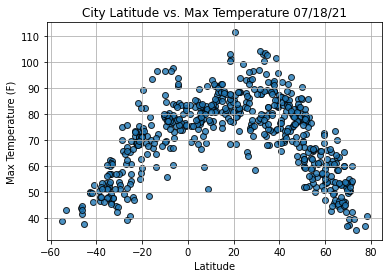

In [13]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()